# Great Learning - Capstone Project - NLP | Automated Ticket Assignment
*  **Submitted By**: Gaurav, Karishma, Lavanya, Pallavi and Swati 
* **Status** : In-Progress (EDA, Feature Engineering & Selection)
* **Date of Submission** : TBD
* **Dataset** : https://drive.google.com/drive/u/0/folders/1xOCdNI2R5hiodskIJbj-QySMQs6ccehL

# Problem Statement
One of the key activities of any IT function is to ensure there is no impact to the Business operations through Incident Management process. An incident is an unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business.

The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.

These incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). 

**The goal of this project is to build a classifier that can classify the incidents by analysing text**.


# Solution
The solution is to build a classification model that can analyse the text and classify to appropriate Service Desk team.

# Approach


*   Analyse and Understand the structure of data
*   Visualize data
*   Text preprocessing
*   Create word vocabulary and Tokens
*   Build a Classification model
*   Train the model
*   Test the Model 

## Get Required Files from Drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# changing present working directory
import os
#os.chdir("/content/drive/My Drive/Colab_Notebooks/NLP") # Correct @Styagi
os.chdir("/content/drive/My Drive/Capstone Project/")
os.getcwd()

'/content/drive/My Drive/Capstone Project'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.set_palette("Spectral")

import re
from pprint import pprint
from sklearn import preprocessing 
import string 

import warnings
warnings.filterwarnings(action='ignore')

In [20]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['received from', 'hi', 'hello','i','am','cc','sir','good morning','gentles','dear'])
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from gensim.utils import tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


#**## Reading and Exploring Data**

## Reading Data "Input Data Synthetic (created but not used in our project).xlsx". Exploring the data and getting some insights about the data.

In [21]:
# Read Dataset
file_name = "Ticket_Data.xlsx" 
df = pd.read_excel(file_name,encoding='cp1252')
df = df.rename(columns = {"Short description": "Short_description",
                          "Assignment group": "Group"})
df.head()

,Short_description,Description,Caller,Group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [22]:
# Checking Shape of the data
print("Data shape:", df.shape)
print("Data Description:")
df.describe()

Data shape: (8500, 4)
Data Description:


,Short_description,Description,Caller,Group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [0]:
def wordCloudText(df_column):
  title = ("Most Frequent words in ") + df_column.name
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=200,
                        max_font_size=40, random_state=42).generate(str(df_column.values.tolist()))
  print(wordcloud)
  fig = plt.figure(1,figsize = (20, 8))
  plt.imshow(wordcloud)
  plt.title(title ,fontsize=30)
  plt.axis('off')
  plt.show()

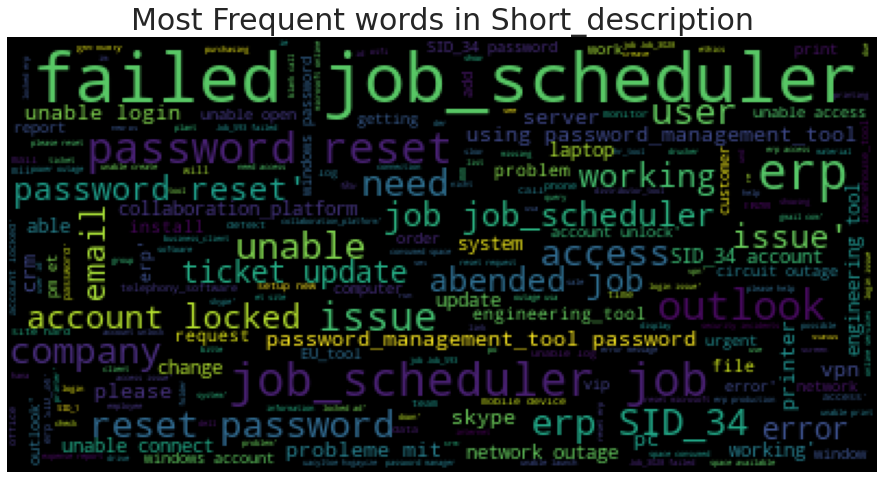

In [24]:
wordCloudText(df.Short_description)

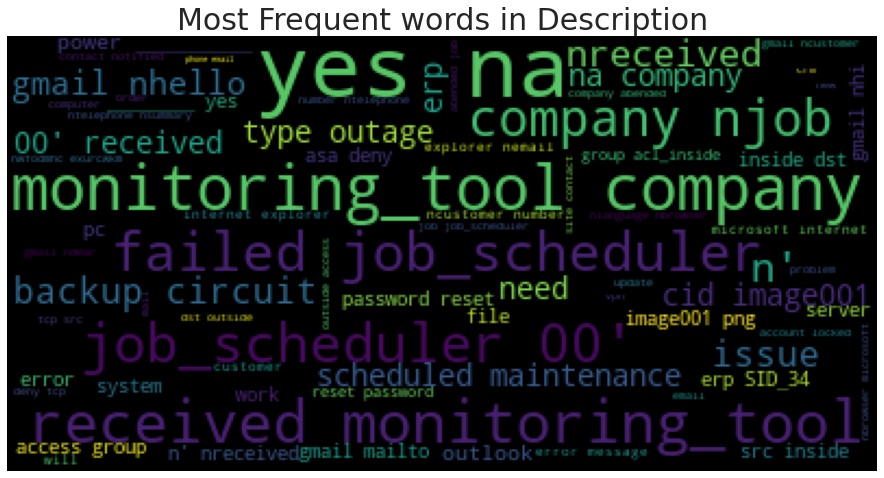

In [25]:
wordCloudText(df.Description)

In [26]:
#checking the number of Groups in the dataset
df.groupby('Group').agg({'Group': 'count'})

,Group
Group,
GRP_0,3976
GRP_1,31
GRP_10,140
GRP_11,30
GRP_12,257
...,...
GRP_71,2
GRP_72,2
GRP_73,1


In [27]:
# Checking null values in Short description column
bool_series = pd.isnull(df["Short_description"])  
 
# displaying data where Short description = NaN  
df[bool_series]  

,Short_description,Description,Caller,Group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0


In [28]:
# Checking null values in Description column
bool_series = pd.isnull(df["Description"])  
 
# displaying data where Description = NaN  
df[bool_series] 

,Short_description,Description,Caller,Group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


## Visualising Data

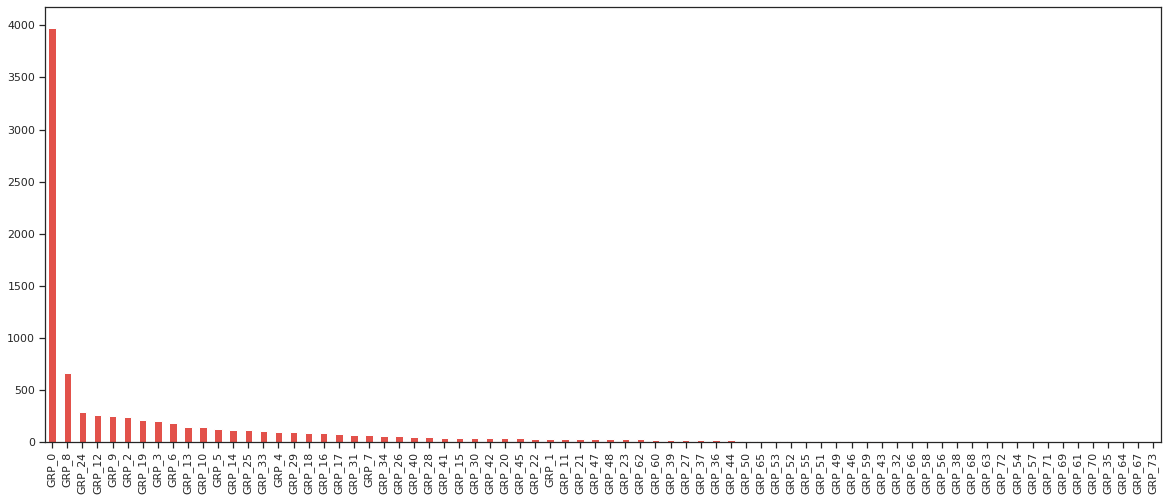

In [29]:
import matplotlib.pyplot as plt
df['Group'].value_counts().plot(kind= 'bar', figsize = (20, 8))

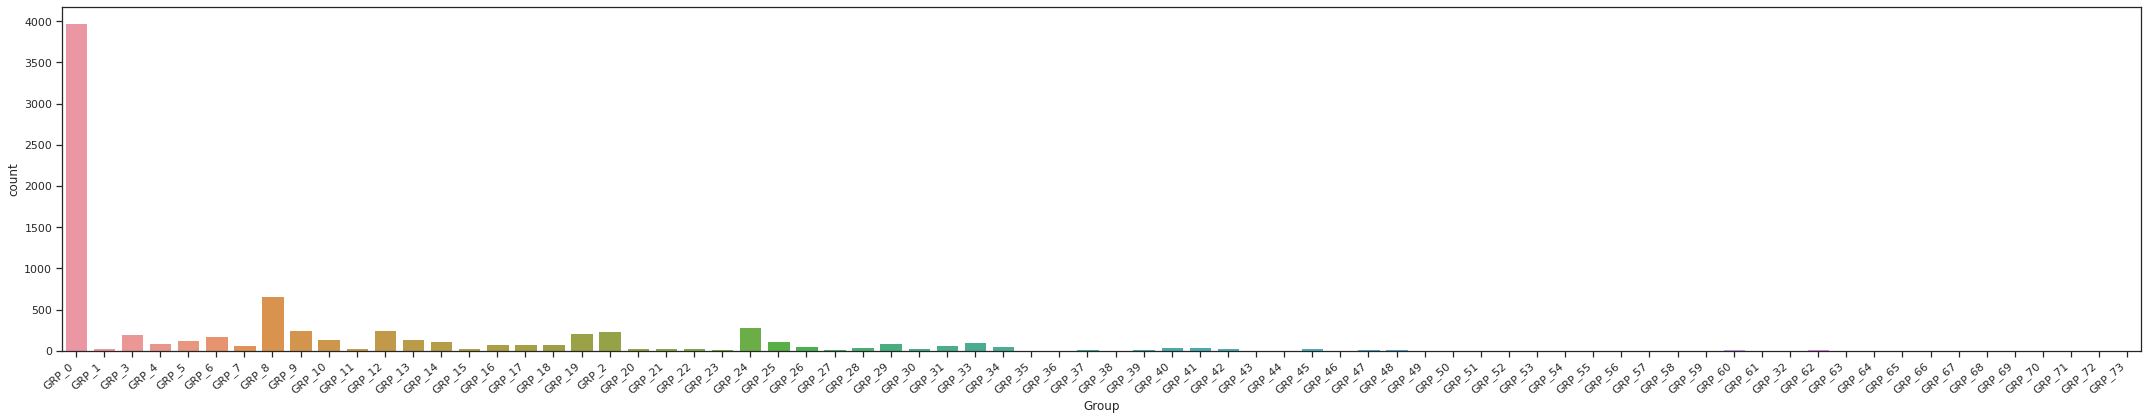

In [30]:
#Viewing frequency distribution of Assignment Groups
import seaborn as sns
plt.figure(figsize = (30,6))
grp = sns.countplot(df['Group'])
grp.set_xticklabels( grp.get_xticklabels(), rotation=40,ha="right")
plt.tight_layout()

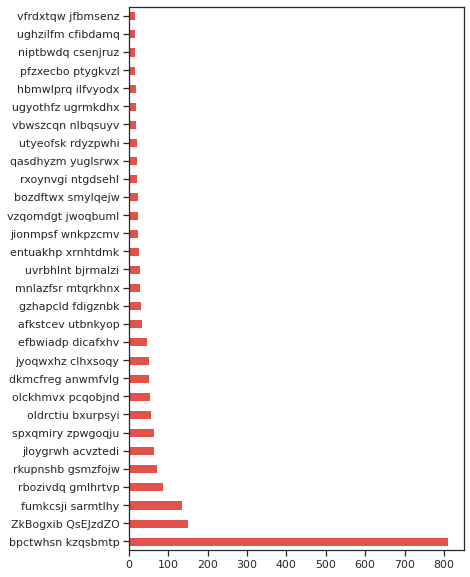

In [31]:
#Visualizing some of the Caller data
plt.figure(figsize=(20, 10))
df['Caller'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

In [32]:
caller_data=pd.DataFrame(df['Caller'].value_counts().to_frame()).T
caller_data

,bpctwhsn kzqsbmtp,ZkBogxib QsEJzdZO,fumkcsji sarmtlhy,rbozivdq gmlhrtvp,rkupnshb gsmzfojw,jloygrwh acvztedi,spxqmiry zpwgoqju,oldrctiu bxurpsyi,olckhmvx pcqobjnd,dkmcfreg anwmfvlg,jyoqwxhz clhxsoqy,efbwiadp dicafxhv,afkstcev utbnkyop,gzhapcld fdigznbk,mnlazfsr mtqrkhnx,uvrbhlnt bjrmalzi,entuakhp xrnhtdmk,jionmpsf wnkpzcmv,vzqomdgt jwoqbuml,bozdftwx smylqejw,rxoynvgi ntgdsehl,qasdhyzm yuglsrwx,utyeofsk rdyzpwhi,vbwszcqn nlbqsuyv,ugyothfz ugrmkdhx,hbmwlprq ilfvyodx,pfzxecbo ptygkvzl,niptbwdq csenjruz,ughzilfm cfibdamq,vfrdxtqw jfbmsenz,mfeyouli ndobtzpw,uxgrdjfc kqxdjeov,xwirzvda okhyipgr,ctvaejbo mjcerqwo,tqfnalpj qyoscnge,wktesmbp lorjymef,obanjrhg rnafleys,aorthyme rnsuipbk,rdfjsawg zpmxgdcw,vkzwafuh tcjnuswg,...,uadkqcsj xtmjlari,tmjowelq ojvkxlyd,yjxuqdto sivnzgok,ctbsupdy auhocbli,puxiomgy ndjorwab,qdgcilzf cpzlmesa,sgaczfvo wxmkrzfu,xjeblpst dohnewjg,ovnedzxg pylshdvb,cqrmewsi xypfqhid,tkglinmz dktpawfm,nfybpxdg yjtdkfuo,uylomcrx nfvjsgze,cjnlsbkq ocxnrewb,odfimpjg ptfoiake,bpnuklrh qjxnhueo,lpnzjimy mwtvondq,xnmgsawf bwghcmxq,aikejxpb xdavwocg,snkeuizv gsjndfuk,efulzico epgfbhmt,tpqhevdg zluijfwv,rcdanwut kzbfstxm,hlcujyed hqfolasz,ixefmkyb bkyfisxz,lntbvwgk doqhisxf,yfqoaepn xnezhsit,zlnfpuam aktplhre,szhljtcx rtmxlegk,wgmtckef atgmfybs,urkwvedc qcibogpt,whflryeb fatgdzhq,ukqoiswv unjarfoq,cplwfdjk djtriwby,pmwuotcq oiuybwzg,pwfirvgu ydwlhuzi,fhiauwkz vwcqrohl,rxoqczbj glanwbvu,zslugaxq dtwlrofu,epgjmacy hktjzngw
Caller,810,151,134,87,71,64,63,57,54,51,51,45,32,30,28,27,25,24,24,23,21,21,21,19,17,17,16,16,16,16,15,15,14,14,13,13,13,13,12,12,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [33]:
#Creating dataframe of callers on the basis of their frequency of calling
n_caller = list(df['Caller'].value_counts())
caller = list(df['Caller'].value_counts().index)

data = pd.DataFrame(data=caller,columns=['caller'])
data['n_caller'] = n_caller
len(data['caller'])

2950

In [34]:
#Since caller column contains anonymous data, assigning name Caller1, Caller2,..... for better visualization 
count = 0
new_caller = []
while count != len(data):
    new_caller.append('Caller'+''+ str(count+1))
    count = count +1
data['caller'] = new_caller
data = data.head(20)
data.head(10)

,caller,n_caller
0,Caller1,810
1,Caller2,151
2,Caller3,134
3,Caller4,87
4,Caller5,71
5,Caller6,64
6,Caller7,63
7,Caller8,57
8,Caller9,54
9,Caller10,51


In [35]:
#top 20 callers
fig = px.bar(data, x='caller', y='n_caller',hover_data=['n_caller'],color='n_caller')
fig.show()

## "Caller" column seems to be anonymised data (usernames/ids). We can drop it.

In [36]:
df_v1 = df.drop('Caller',axis=1)
df_v1.head(20)

,Short_description,Description,Group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0


In [37]:
# Fetch rows with same data in "Short_description" & "Description"
df_v1[df_v1['Short_description'] == df_v1['Description']].count()

Short_description    2862
Description          2862
Group                2862
dtype: int64

## Finding & Imputing Null values in Short Description & Description columns

In [38]:
# Check for number of null values in each columns
print("Total Null Values in data:", df_v1.isnull().sum().sum())
print("\nNull Values accross columns:\n", df_v1.isnull().sum())
print("\nData with 'Null' Short Description")
df_v1.loc[df_v1['Short_description'].isnull()==True]

Total Null Values in data: 9

Null Values accross columns:
 Short_description    8
Description          1
Group                0
dtype: int64

Data with 'Null' Short Description


,Short_description,Description,Group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0


In [39]:
print("\nData with 'Null' Description")
df_v1.loc[df_v1['Description'].isnull()==True]


Data with 'Null' Description


,Short_description,Description,Group
4395,i am locked out of skype,NaN,GRP_0


In [40]:
# Impute missing values
df_v1['Short_description'].fillna('the', inplace=True) # replacing null values with stopword 'the'
df_v1['Description'].fillna('the', inplace=True) # replacing null values with stopword 'the'

print("Null values imputed")
print("Null Values in data after imputation:", df_v1.isnull().sum().sum())

Null values imputed
Null Values in data after imputation: 0


## For "Assignment Group" type where number of tickets in te category is less than specified freuency, we will mark then into "GRP_Manual". All "GRP_Manual" tickets should be triaged manually, until the model has enough data to categorise them automatically.

In [41]:
# Reset Assignment Group for group types with less data
Frequency_Threshold = 50
count = df_v1['Group'].value_counts(ascending=True)
idx = count[count.lt(Frequency_Threshold)].index
df_v1.loc[df_v1['Group'].isin(idx), 'Group'] = 'GRP_Manual'
print("Updated unique group types",df_v1['Group'].nunique())
df_v1['Group'].value_counts(ascending=True)


Updated unique group types 25


GRP_26          56
GRP_34          62
GRP_7           68
GRP_31          69
GRP_17          81
GRP_16          85
GRP_18          88
GRP_29          97
GRP_4          100
GRP_33         107
GRP_25         116
GRP_14         118
GRP_5          129
GRP_10         140
GRP_13         145
GRP_6          184
GRP_3          200
GRP_19         215
GRP_2          241
GRP_9          252
GRP_12         257
GRP_24         289
GRP_8          661
GRP_Manual     764
GRP_0         3976
Name: Group, dtype: int64

<Figure size 5760x432 with 0 Axes>

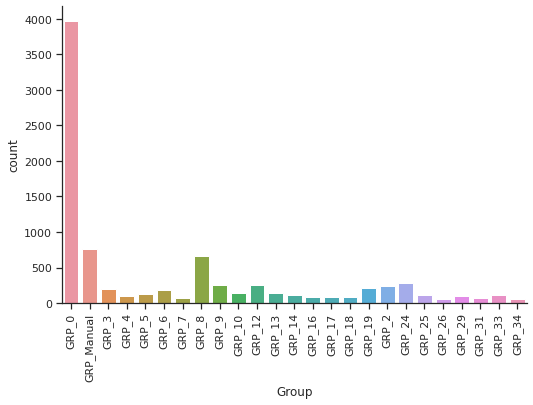

In [43]:
#Viewing frequency distribution after reset of Assignment Groups based on the Frequency_Threshold
plt.figure(figsize = (80,6))
g = sns.factorplot("Group", data=df_v1, aspect=1.5, kind="count")
g.set_xticklabels(rotation=90)

In [44]:
le = preprocessing.LabelEncoder() 
df_v1['Group']= le.fit_transform(df_v1['Group']) # LabelEncode 'Groups'
df_v1.head(20) 

,Short_description,Description,Group
0,login issue,-verified user details.(employee# & manager na...,0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,0
3,unable to access hr_tool page,unable to access hr_tool page,0
4,skype error,skype error,0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,24
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,0
9,ticket update on inplant_874773,ticket update on inplant_874773,0


## Text Preprocessing

In [0]:
  # Function for Text Cleaning with regex. Pass the column
  def text_preprocessing(df_column):
    data = df_column.values.tolist() # Convert to list
    temp = []
    for sentence in data:
        sentence = re.sub(r"\[(.*?)\]"," ", sentence)  # remove text in []
        sentence = re.sub(r"\((.*?)\)"," ", sentence)  # remove text in ()
        sentence = re.sub(r"[[h][t][t][p][\S]+|[w][w][w][\S]+|[\S]+[@][\S]+"," ", sentence)  # remove email addresses, web address and urls
        sentence = re.sub(r"[\S]+[\d]+[\S]+"," ", sentence) # remove alphanumerics and numerics (dates, time, request id etc.)
        sentence = re.sub(r"\W(?<!['. ])"," ", sentence)  # remove all non words with negative look back except ('. spaces) 
        sentence = re.sub(r"[^a-zA-z| ]+"," ", sentence) # remove non-english text
        sentence = re.sub(r"[\_]+"," ", sentence) # remove underscores
        sentence = re.sub(r"[\s]+"," ", sentence) # replace multiple spaces with single space
        sentence = sentence.strip('\n')
        sentence = sentence.lower()
        temp.append(sentence)
    return(temp)


In [46]:
# Cleaned both - 'Short_Description & Description'
df_v1.Short_description = text_preprocessing(df_v1.Short_description)
df_v1.Description = text_preprocessing(df_v1.Description)
df_v1.head()

,Short_description,Description,Group
0,login issue,verified user details checked the user name i...,0
1,outlook,received from hello team my meetings skype me...,0
2,cant log in to vpn,received from hi i cannot log on to vpn best,0
3,unable to access hr tool page,unable to access hr tool page,0
4,skype error,skype error,0


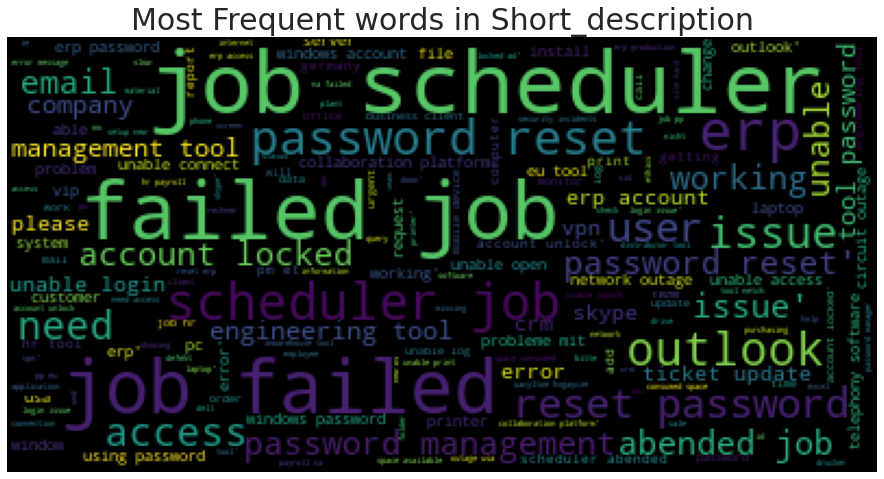

In [47]:
wordCloudText(df_v1.Short_description)

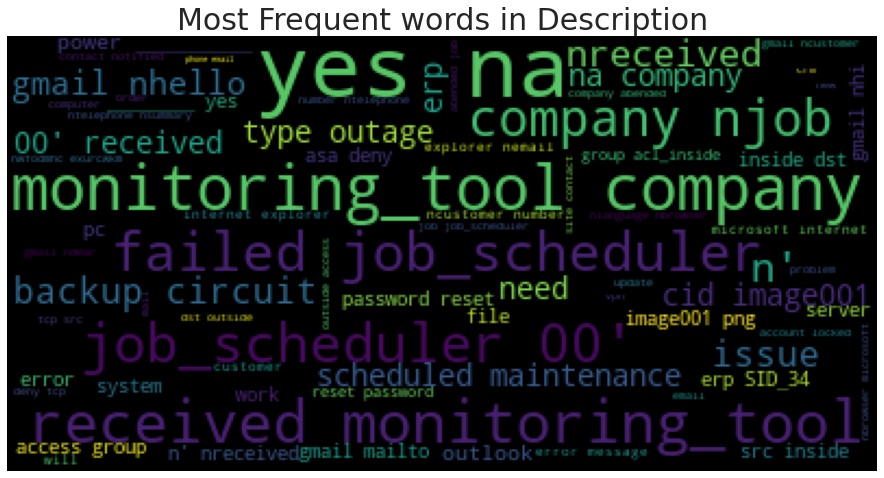

In [48]:
wordCloudText(df.Description)

## Concatenating "Short Description" and "Description" to get "Summary" Tickets

In [49]:
df_v1["Summary"] = df_v1['Short_description'].str.cat(df_v1['Description'], sep = ". ")
df_v2 = df_v1.drop(['Short_description','Description'],axis=1)
df_v2 = df_v2[['Summary','Group']]
df_v2.head(20) 

,Summary,Group
0,login issue. verified user details checked th...,0
1,outlook. received from hello team my meetings...,0
2,cant log in to vpn. received from hi i cannot...,0
3,unable to access hr tool page. unable to acces...,0
4,skype error . skype error,0
5,unable to log in to engineering tool and skype...,0
6,event the value of mountpoint threshold for . ...,24
7,employment status new non employee . employm...,0
8,unable to disable add ins on outlook. unable t...,0
9,ticket update on . ticket update on,0


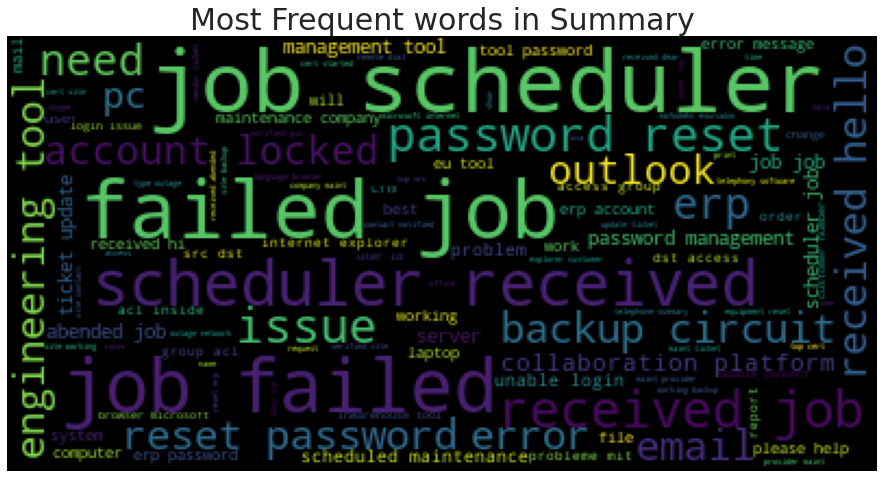

In [50]:
wordCloudText(df_v2.Summary)

In [55]:
#convert summary to a list of words
smmry_words = df_v2['Summary'].values.tolist()
word_list = [word for line in smmry_words for word in line.split()]
word_list

['login',
 'issue.',
 'verified',
 'user',
 'details',
 'checked',
 'the',
 'user',
 'name',
 'in',
 'ad',
 'and',
 'reset',
 'the',
 'password',
 'advised',
 'the',
 'user',
 'to',
 'login',
 'and',
 'check',
 'caller',
 'confirmed',
 'that',
 'he',
 'was',
 'able',
 'to',
 'login',
 'issue',
 'resolved',
 'outlook.',
 'received',
 'from',
 'hello',
 'team',
 'my',
 'meetings',
 'skype',
 'meetings',
 'etc',
 'are',
 'not',
 'appearing',
 'in',
 'my',
 'outlook',
 'calendar',
 'can',
 'somebody',
 'please',
 'advise',
 'how',
 'to',
 'correct',
 'this',
 'kind',
 'cant',
 'log',
 'in',
 'to',
 'vpn.',
 'received',
 'from',
 'hi',
 'i',
 'cannot',
 'log',
 'on',
 'to',
 'vpn',
 'best',
 'unable',
 'to',
 'access',
 'hr',
 'tool',
 'page.',
 'unable',
 'to',
 'access',
 'hr',
 'tool',
 'page',
 'skype',
 'error',
 '.',
 'skype',
 'error',
 'unable',
 'to',
 'log',
 'in',
 'to',
 'engineering',
 'tool',
 'and',
 'skype.',
 'unable',
 'to',
 'log',
 'in',
 'to',
 'engineering',
 'tool',
 

In [60]:
#Total number of words in summary
n_words = len(word_list)
n_words

254657

In [56]:
#Determining Unique Word Count
n_unique_words = len(set(word_list))
n_unique_words

13724

In [61]:
#Determining Word Coverage i.e. average number of times a word is occurring in the text.
word_coverage = n_words / n_unique_words
word_coverage

18.55559603614107

In [62]:
#the three most frequent occuring words
from nltk.probability import FreqDist
word_freq = nltk.FreqDist(word_list)
top5_words = word_freq.most_common(5)
top5_words

[('to', 8694), ('the', 6953), ('in', 5093), ('.', 4144), ('job', 3910)]

In [63]:
# word tokenisation & removal of stop words & gibberish word(by typos, anonymised names)

# Remove stopwords
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Remove words not in Englsih Dictionary (typos, anonymised names)
df_v2['Summary'] = df_v2['Summary'].apply(lambda x: ' '.join([word for word in x.split() if word in (words)]))

# Tokenise 'Summary' column
data = df_v2.Summary.values.tolist()
data = [list(tokenize(sentences)) for sentences in data]

# Remove duplicates
data = [list(words) for words in {frozenset(sentence) for sentence in data}]

# lemmetise words
# wordnet_lemmatizer = WordNetLemmatizer()
# temp = []
# for eachrow in data:
#     lemma_words = []
#     for eachword in eachrow:
#         eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "n")
#         eachword = wordnet_lemmatizer.lemmatize(eachword, pos = "v")
#         eachword = wordnet_lemmatizer.lemmatize(eachword, pos = ("a"))
#         lemma_words.append(eachword)
#     temp.append(lemma_words)

# data = temp  
# data = [(" ".join(sentence))  for sentence in data]

len(data)

5700

In [64]:
data

[['engineering', 'tool', 'unable', 'connected', 'submit'],
 ['following',
  'trying',
  'discount',
  'get',
  'form',
  'collaboration',
  'look',
  'request',
  'received',
  'submit',
  'please',
  'error'],
 ['accidentally',
  'recover',
  'information',
  'possible',
  'user',
  'collaboration',
  'yesterday',
  'platform'],
 ['daily', 'job', 'server', 'search', 'received'],
 ['cost',
  'team',
  'since',
  'advise',
  'material',
  'yet',
  'ticket',
  'best',
  'sent',
  'received',
  'fico',
  'please',
  'number',
  'till',
  'last'],
 ['benefit',
  'team',
  'contact',
  'collaboration',
  'process',
  'helpful',
  'tool',
  'enter',
  'sound',
  'however',
  'disaster',
  'conference',
  'really',
  'instructed',
  'hired',
  'fact',
  'eligibility',
  'experience',
  'resolve',
  'expense',
  'work',
  'request',
  'still',
  'change',
  'time',
  'log',
  'corrected',
  'provide',
  'follow',
  'far',
  'sent',
  'able',
  'building',
  'transfer',
  'beyond',
  'problem',